In [6]:
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


import numpy as np

matplotlib.rcParams.update({'font.size': 14})

In [19]:
N = 2250

naive_nat = []
quic_nat = []


with open("default_latency_data.txt") as f:
    latency = f.readlines()
    i = 0
    for t in latency:
        i+=1
        if i > N:
            break
        t = t.strip()
        t = int(t)/1e6
        naive_nat.append(int(t))

with open("quic_latency_data.txt") as f:
    latency = f.readlines()
    i = 0
    for t in latency:
        i+=1
        if i > N:
            break
        t = t.strip()
        t = int(t)/1e6
        quic_nat.append(int(t))

In [20]:
avg_naive_nat = sum(naive_nat) / len(naive_nat)
avg_naive_nat

48.669333333333334

In [21]:
avg_quid_nat = sum(quic_nat) / len(quic_nat)
avg_quid_nat


51.06177777777778

/tmp/ipykernel_15528/1828243512.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


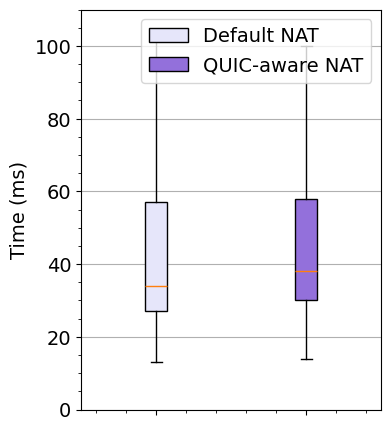

In [28]:

data = [naive_nat, quic_nat]
 
fig = plt.figure(figsize =(3, 4))
 
# Creating axes instance
colors = ['lavender', 'mediumpurple']

ax = fig.add_axes([0, 0, 1, 1])

xticks = ["", ""]
ax.set_xticklabels(xticks)

ax.set_ylabel("Time (ms)")
ax.set_ylim([0, 110])
# # ax.set_yticks([100000])#
ax.grid(axis="y")
ax.tick_params(axis='y', which='minor', labelsize=11)

ax.minorticks_on()
bp = ax.boxplot(data, patch_artist=True, notch=False,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
labels = ["Default NAT", "QUIC-aware NAT"]
ax.legend([bp["boxes"][0], bp["boxes"][1]], labels, loc="upper right")

plt.savefig('nat_latency_box.pdf',bbox_inches='tight', dpi=150)
plt.show()

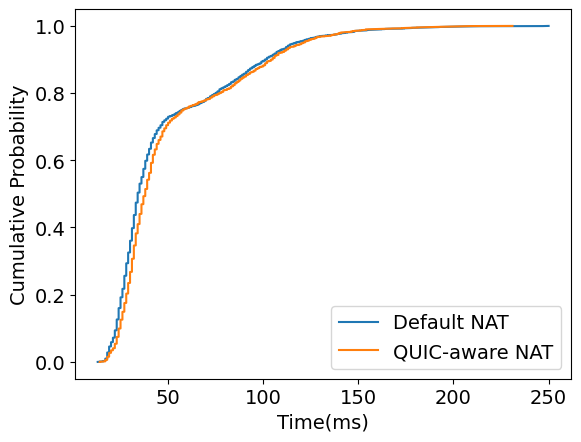

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 
  
# No of data points used 
N = len(naive_nat)
    

    
# sort the data in ascending order 
naive_nat = np.sort(naive_nat)
quic_nat = np.sort(quic_nat) 
  
# get the cdf values of y 
y = np.arange(N) / float(N) 
  

plt.xlabel('Time(ms)') 
plt.ylabel('Cumulative Probability') 
  
# plt.title('CDF of Default NAT and QUIC-aware NAT') 
  
plt.plot(naive_nat, y) 
plt.plot(quic_nat, y)
plt.legend(["Default NAT", "QUIC-aware NAT"])
plt.savefig('nat_latency_cdf.pdf',bbox_inches='tight', dpi=150)